In [2]:
# importing image object from PIL
import math
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np

In [4]:
base_folder = "spatial_sim_data"
labels = pd.read_csv(base_folder + "/labels.csv", names = ["path", "N", "ss"])
print(labels)

                                        path      N   ss
0      images/spatial_sim_parents_1000_0_500   1012  500
1      images/spatial_sim_parents_1000_1_500   1006  500
2      images/spatial_sim_parents_1000_2_500   1020  500
3      images/spatial_sim_parents_1000_3_500   1018  500
4      images/spatial_sim_parents_1000_4_500   1017  500
...                                      ...    ...  ...
2425  images/spatial_sim_parents_9900_22_500  10067  500
2426  images/spatial_sim_parents_9900_23_500  10082  500
2427  images/spatial_sim_parents_9900_24_500   9969  500
2428  images/spatial_sim_parents_9900_25_500  10011  500
2429  images/spatial_sim_parents_9900_26_500  10018  500

[2430 rows x 3 columns]


In [3]:
def get_kin_rows(path):
    kin = pd.read_csv(base_folder + "/" + path, header = 0)
    kin_rows = kin.loc[(kin["parent0of1"]==1) | (kin["parent1of0"]==1)]
    print(len(kin_rows))
    return(kin_rows)


In [4]:
def spaghetti_plot(kin_rows):
    w, h = 100, 100
    # creating new Image object
    img = Image.new("RGB", (w, h))

    # create line image
    img1 = ImageDraw.Draw(img)
    for i in range(len(kin_rows)):
        row = kin_rows.iloc[i]
        x0 = row["x0"]*100
        x1 = row["x1"]*100
        y0 = row["y0"]*100
        y1 = row["y1"]*100
        img1.line([(x0, y0), (x1, y1)], fill ="white", width = 0)
    return(img)

88


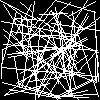

In [5]:
new_img = spaghetti_plot(get_kin_rows(labels["path"].iloc[0]))
display(new_img)

30


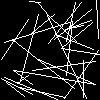

In [6]:
new_img = spaghetti_plot(get_kin_rows(labels["path"].iloc[3]))
display(new_img)

612
88


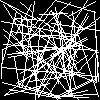

610
92


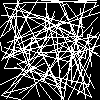

1255
32


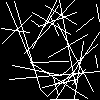

1243
30


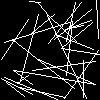

In [7]:
for i in range(len(labels)):
    print(labels["N"].iloc[i])
    new_img = spaghetti_plot(get_kin_rows(labels["path"].iloc[i]))
    display(new_img)

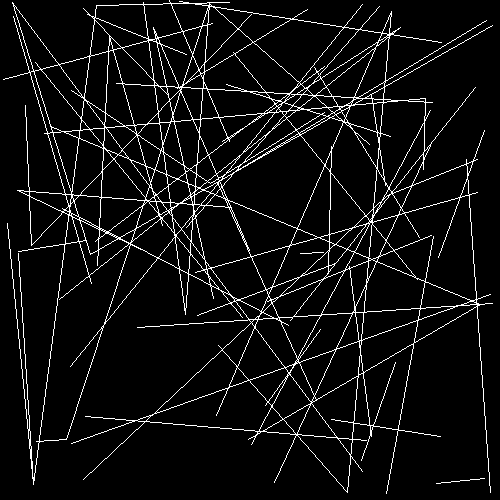

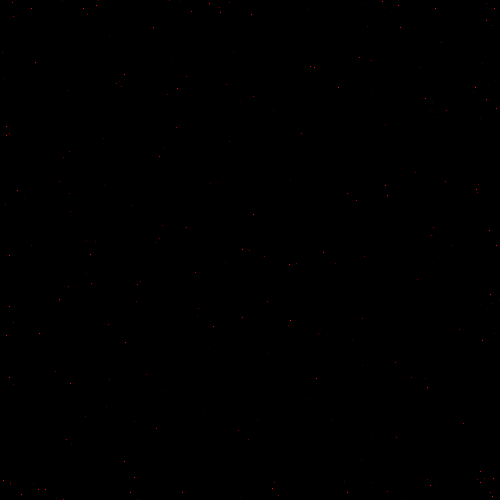

In [21]:
path = "input_matrices/spatial_sim_parents_500_0_316.csv"
kin = pd.read_csv(base_folder + "/" + path, header = 0)
w, h = 500, 500
# creating new Image object
spaghetti = Image.new("L", (w, h))
sampling = Image.new("RGB", (w, h))
# create line image of parents
img1 = ImageDraw.Draw(spaghetti)
img2 = ImageDraw.Draw(sampling)
for i in range(len(kin)):
    row = kin.iloc[i]
    x0 = row["x0"]*w
    x1 = row["x1"]*w
    y0 = row["y0"]*h
    y1 = row["y1"]*h
    age0 = row["age0"]
    age1 = row["age1"]
    if row["parent0of1"]==1 or row["parent1of0"]==1:
        img1.line([(x0, y0), (x1, y1)], width = 0, fill = "white")
    img2.point((x0, y0), fill = (round(age0*10), 0, 0))
    #img2.point((x1, y1), fill = age1)
display(spaghetti)
display(sampling)

In [3]:
import math
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import sys
from scipy import stats
import itertools
rng = np.random.default_rng()

# Get the parents file path from the command line
parents_file = "spatial_sim_data/spatial_parents/spatial_sim_parents_1200_0.csv"
n = int(500)
spaghetti_out = "spaghetti.png"
sampling_out = "sampling.png"
outN = "pop_size.csv"

In [10]:
parents = pd.read_csv(parents_file)
parents.columns = ['individual', 'parent1', 'parent2', 'x', 'y', 'age']
N = len(parents)
sample_rows = rng.choice(np.arange(N), n, replace = False)
pairs = list(itertools.combinations(sample_rows, 2))
max_age = np.max(parents['age'])
print(max_age)

124.0


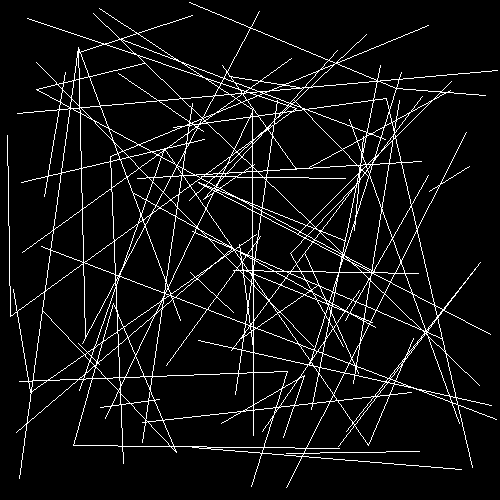

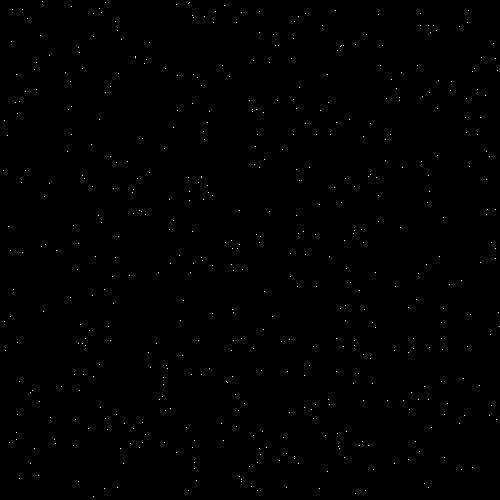

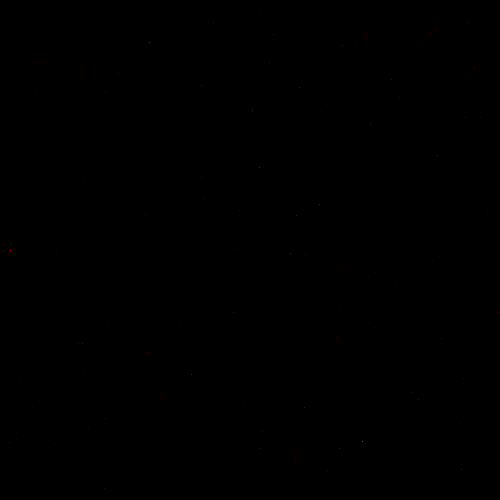

In [11]:
# creating new Image object for spaghetti and sampling
w, h = 500, 500
spaghetti = Image.new("RGB", (w, h))
sampling = Image.new("RGB", (w, h))
ages = Image.new("RGB", (w, h))
img1 = ImageDraw.Draw(spaghetti)
img2 = ImageDraw.Draw(sampling)
img3 = ImageDraw.Draw(ages)

for pair in pairs:
    ind0_i = pair[0]
    ind1_i = pair[1]
    ind0 = parents.iloc[ind0_i, :]
    ind1 = parents.iloc[ind1_i, :]
    x0 = ind0['x']*w
    y0 = ind0['y']*h
    x1 = ind1['x']*w
    y1 = ind1['y']*h
    age0 = ind0['age']
    age1 = ind1['age']
    age0_color = round((age0/max_age)*255)
    age1_color = round((age1/max_age)*255)
    if(ind0['individual'] == ind1['parent1'] or ind1['individual'] == ind0['parent1']):
        img1.line([(x0, y0), (x1, y1)], fill ="white", width = 0)
    img2.point([(x0, y0), (x1, y1)], fill = "white")
    img3.point((x0, y0), fill = (age0_color, 0, 0))
    img3.point((x1, y1), fill = (age1_color, 0, 0))

display(spaghetti)
display(sampling) 
display(ages)  

In [8]:
spaghetti.save("spaghetti.png")
sampling.save("sampling.png")
ages.save("ages.png")